## Neural networks models: practicals

In this notebook you will practice simple neural networks models for classification. 
You will again be using the `iris` dataset, and you are requested to choose any combinations of the following:

- binary or multiclass classification: you can for instance try a different binarization (e.g. setosa vs versicolor+virginica)
- number of hidden layers
- number of nodes within layers
- type of activation functions in the hidden layers
- number of epochs
- split between the training and the test sets
- number of features to include in the model
- etc.

Let's start by importing some basic libraries and the data:

In [2]:
## import libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

In [4]:
iris = sklearn.datasets.load_iris()
iris.data = pd.DataFrame(iris.data, columns=iris.feature_names) #converting numpy array -> pandas DataFrame
iris.target = pd.Series(iris.target) #converting numpy array -> pandas Series
iris.target = iris.target.to_frame() #converting Pandas series to dataframe

Shape of the feature table: (150, 4)
Shape of the target array: (150, 1)


In [ ]:
#we want to have the same proportion of classes in both train and validation sets
from sklearn.model_selection import StratifiedShuffleSplit

#building a StratifiedShuffleSplit object (sss among friends) with 20% data
#assigned to validation set (here called "test")
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

#the .split() method returns (an iterable over) two lists which can be
#used to index the samples that go into train and validation sets
for train_index, val_index in sss.split(X, y):
    X_train = X[train_index, :]
    X_val   = X[val_index, :]
    y_train   = y[train_index]
    y_val     = y[val_index]
    
#let's print some shapes to get an idea of the resulting data structure
print("Training features size: ", X_train.shape)
print("Test features size: ", X_val.shape)
print("Training targets size: ", y_train.shape)
print("Test targets size: ", y_val.shape)

print("Type of the training features object: ", type(X_train))
print("Type of the training targets object: ", type(y_train))

Training features size:  (455, 30)
Test features size:  (114, 30)
Training targets size:  (455,)
Test targets size:  (114,)
Type of the training features object:  <class 'numpy.ndarray'>
Type of the training targets object:  <class 'numpy.ndarray'>


In [ ]:
## # Configuration options
input_shape = (X_train.shape[1],) ## tuple that specifies the number of features 
hidden_nodes = 8
hidden_activation = 'relu'
output_activation = 'sigmoid'
loss_function = 'binary_crossentropy'
optimizer_used = 'SGD' ##stochastic gradient descent
num_epochs = 200

In [ ]:
#we are building a "sequential" model, meaning that the data will 
#flow like INPUT -> ELABORATION -> OUTPUT.
from keras.models import Sequential

#a "dense" layer is a layer were all the data coming in are connected
#to all nodes.
from keras.layers import Dense

# binary classification shallow neural network model in Keras
model = Sequential()
model.add(Dense(units=hidden_nodes, input_shape=input_shape, activation=hidden_activation))
model.add(Dense(1, activation=output_activation))

#the model is declared, but we still need to compile it to actually
#build all the data structures
model.compile(optimizer=optimizer_used, loss=loss_function)

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 248       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)

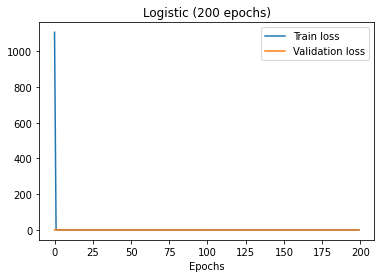

In [ ]:
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, 'Logistic ({} epochs)'.format(num_epochs))

In [ ]:
predictions = model.predict(X_val)
predicted_labels = np.where(predictions > 0.5, "cancer", "no-cancer")
target_labels = y_val.reshape((len(y_val),1))
target_labels = np.where(target_labels > 0.5, "cancer", "no-cancer")

con_mat_df = confusion_matrix(target_labels, predicted_labels, labels=["no-cancer","cancer"])
print(con_mat_df)

[[ 0 42]
 [ 0 72]]
